In [75]:
# Created on Sun Aug 13 13:14:06 2023

# @author: katelynsmith

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex'])
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase

#from tqdm import tqdm 
import tqdm as tqdm
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")


In [76]:

# Defining variables 

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 18.5 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023

In [100]:
times = np.linspace(0, 40, 100) # Array of observation times to compute (days)

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


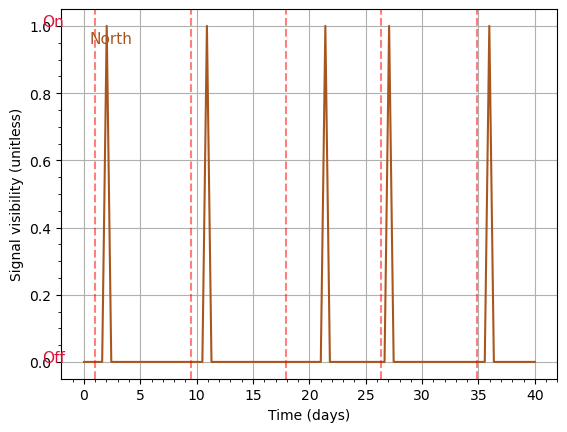

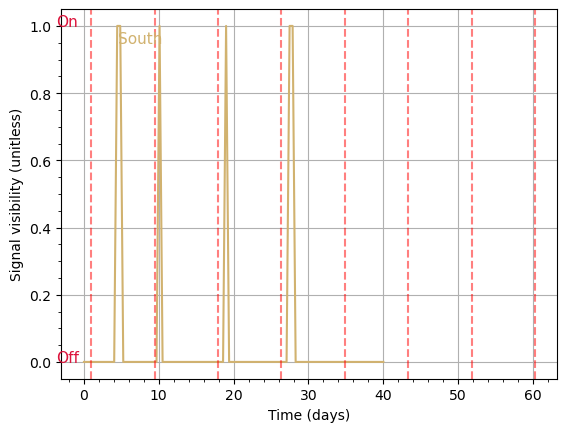

In [101]:
# Plotting results
plt.plot(times, vis_N, color = '#A9561E')
#plt.plot(times % P_s, vis_N, color = '#A9561E')  # attempting to fold light curve
# plt.plot(times % P_s, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=11, color = '#A9561E')
for j in range(5):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )


plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()



plt.plot(times, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=11, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=11, color = '#D1B26F')
for j in range(8):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )

plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

In [11]:
# determining periods rigorously
# auto correlation function
# fold dispersion
# box least squares periodogram **** astropy bls
# ^^^ 1 - signal
# one hemisphere at a time - one is pos stokes V and other is neg

In [102]:

model_N = BoxLeastSquares(times * u.day, 1-vis_N, dy=0.01)

model_S = BoxLeastSquares(times * u.day, 1-vis_S, dy=0.01)


In [13]:
help(BoxLeastSquares.autopower)

Help on function autopower in module astropy.timeseries.periodograms.bls.core:

autopower(self, duration, objective=None, method=None, oversample=10, minimum_n_transit=3, minimum_period=None, maximum_period=None, frequency_factor=1.0)
    Compute the periodogram at set of heuristically determined periods
    
    This method calls :func:`BoxLeastSquares.autoperiod` to determine
    the period grid and then :func:`BoxLeastSquares.power` to compute
    the periodogram. See those methods for documentation of the arguments.



In [ ]:
durations = np.linspace(0.1,2,100)*u.d

best_period_N = []
best_period_S = []

for dur in durations:
    periodogram_N = model_N.autopower(dur)
    periodogram_S = model_S.autopower(dur)
    mpN = np.argmax(periodogram_N)
    bpN = periodogram_N.period[mpN]
    best_period_N.append(bpN.value)
    
    mpS = np.argmax(periodogram_S)
    bpS = periodogram_S.period[mpS]
    best_period_S.append(bpS.value)

    plt.plot(periodogram_N.period.value, periodogram_N.power)
    for j in range(5):
        plt.axvline(bpN.value*(j+1), linestyle='--',color='k')
    plt.xlabel("Period (days)")
    plt.ylabel("Power (W)")

    plt.show()


print("The best period (in days) for the northern hemisphere is")
print(best_period_N)

print("The best period (in days) for the southern hemisphere is")
print(best_period_S)


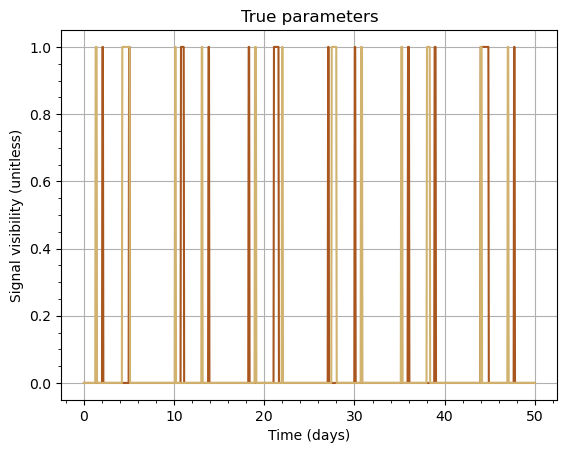

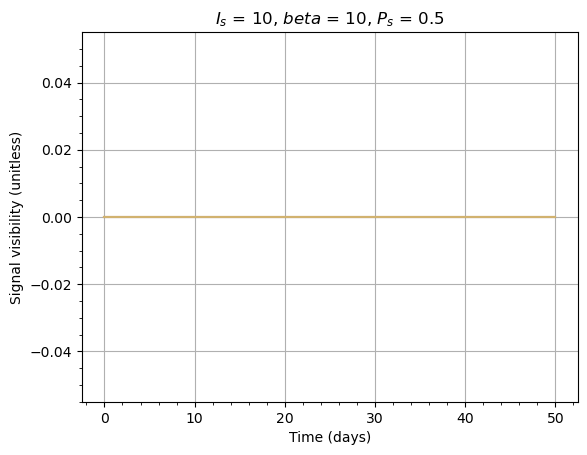

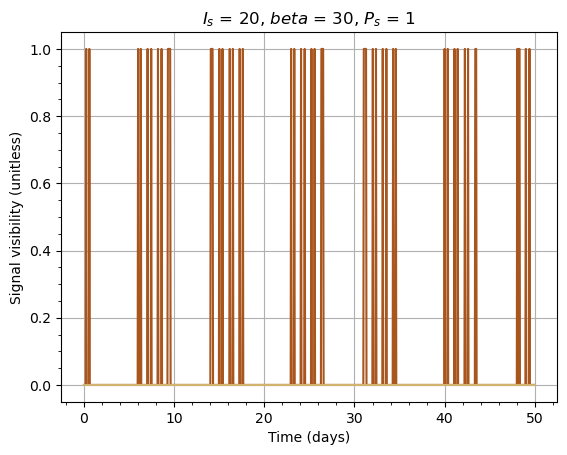

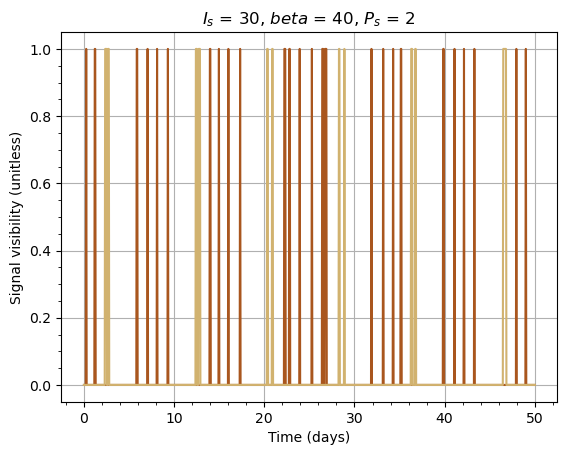

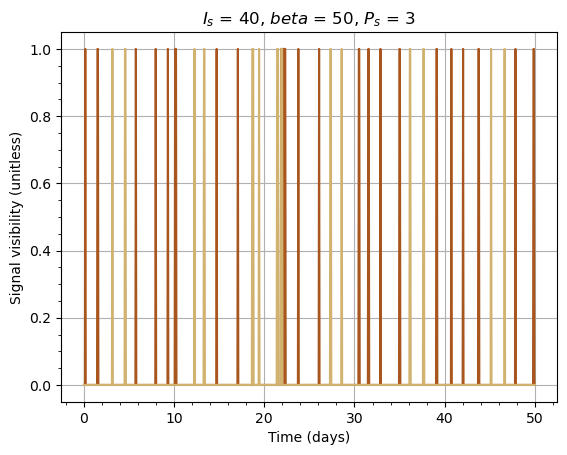

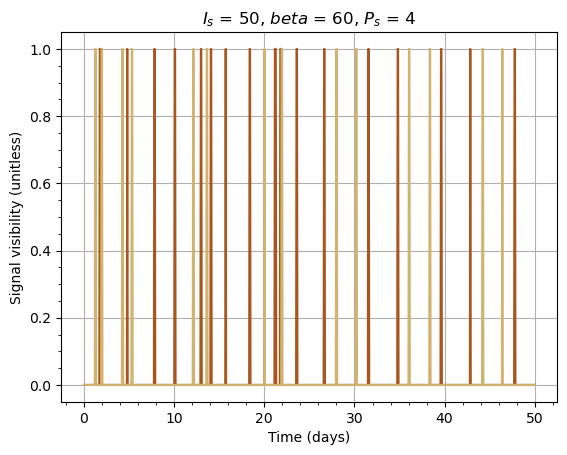

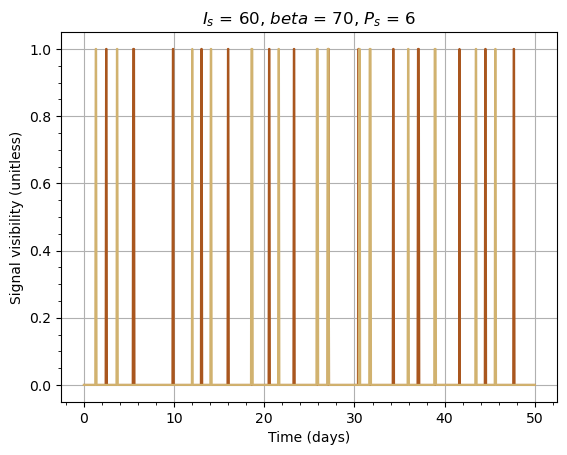

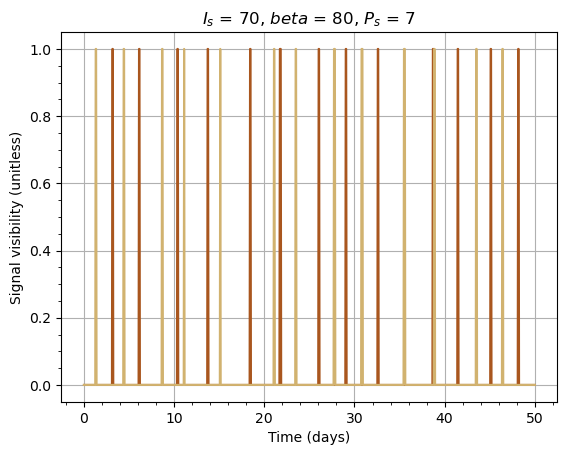

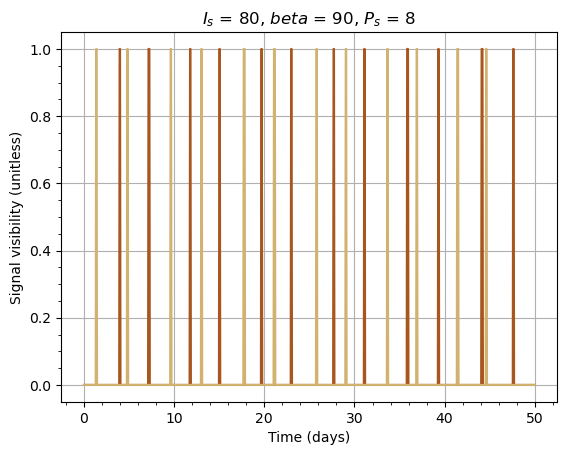

In [126]:
# defining vectors of parameters -- first values are true values of the parameters
modified_i_s = [90, 10, 20, 30, 40, 50, 60, 70, 80]
modified_beta = [20, 10, 30, 40, 50, 60, 70, 80, 90]
modified_P_s = [4.86, 0.5, 1, 2, 3, 4, 6, 7, 8]
modified_P_p = [8.460351, 2, 4, 6, 10, 12, 14, 16, 18]

times = np.linspace(0, 50, 1000) # Array of observation times to compute (days)

vis_N_true = ms.maser(M_s, R_s, modified_P_s[0], modified_i_s[0], B_s, modified_beta[0], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_true = ms.maser(M_s, R_s, modified_P_s[0], modified_i_s[0], B_s, modified_beta[0], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_true, color = '#A9561E')
plt.plot(times, vis_S_true, color = '#D1B26F')
plt.title('True parameters')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_2 = ms.maser(M_s, R_s, modified_P_s[1], modified_i_s[1], B_s, modified_beta[1], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_2 = ms.maser(M_s, R_s, modified_P_s[1], modified_i_s[1], B_s, modified_beta[1], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_2, color = '#A9561E')
plt.plot(times, vis_S_2, color = '#D1B26F')
plt.title('$I_s$ = 10, $beta$ = 10, $P_s$ = 0.5')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_3 = ms.maser(M_s, R_s, modified_P_s[2], modified_i_s[2], B_s, modified_beta[2], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_3 = ms.maser(M_s, R_s, modified_P_s[2], modified_i_s[2], B_s, modified_beta[2], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_3, color = '#A9561E')
plt.plot(times, vis_S_3, color = '#D1B26F')
plt.title('$I_s$ = 20, $beta$ = 30, $P_s$ = 1')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_4 = ms.maser(M_s, R_s, modified_P_s[3], modified_i_s[3], B_s, modified_beta[3], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0] 
vis_S_4 = ms.maser(M_s, R_s, modified_P_s[3], modified_i_s[3], B_s, modified_beta[3], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_4, color = '#A9561E')
plt.plot(times, vis_S_4, color = '#D1B26F')
plt.title('$I_s$ = 30, $beta$ = 40, $P_s$ = 2')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_5 = ms.maser(M_s, R_s, modified_P_s[4], modified_i_s[4], B_s, modified_beta[4], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_5 = ms.maser(M_s, R_s, modified_P_s[4], modified_i_s[4], B_s, modified_beta[4], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_5, color = '#A9561E')
plt.plot(times, vis_S_5, color = '#D1B26F')
plt.title('$I_s$ = 40, $beta$ = 50, $P_s$ = 3')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_6 = ms.maser(M_s, R_s, modified_P_s[5], modified_i_s[5], B_s, modified_beta[5], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_6 = ms.maser(M_s, R_s, modified_P_s[5], modified_i_s[5], B_s, modified_beta[5], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_6, color = '#A9561E')
plt.plot(times, vis_S_6, color = '#D1B26F')
plt.title('$I_s$ = 50, $beta$ = 60, $P_s$ = 4')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_7 = ms.maser(M_s, R_s, modified_P_s[6], modified_i_s[6], B_s, modified_beta[6], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_7 = ms.maser(M_s, R_s, modified_P_s[6], modified_i_s[6], B_s, modified_beta[6], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_7, color = '#A9561E')
plt.plot(times, vis_S_7, color = '#D1B26F')
plt.title('$I_s$ = 60, $beta$ = 70, $P_s$ = 6')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_8 = ms.maser(M_s, R_s, modified_P_s[7], modified_i_s[7], B_s, modified_beta[7], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_8 = ms.maser(M_s, R_s, modified_P_s[7], modified_i_s[7], B_s, modified_beta[7], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1]

plt.plot(times, vis_N_8, color = '#A9561E')
plt.plot(times, vis_S_8, color = '#D1B26F')
plt.title('$I_s$ = 70, $beta$ = 80, $P_s$ = 7')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()

vis_N_9 = ms.maser(M_s, R_s, modified_P_s[8], modified_i_s[8], B_s, modified_beta[8], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[0]
vis_S_9 = ms.maser(M_s, R_s, modified_P_s[8], modified_i_s[8], B_s, modified_beta[8], phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)[1] 

plt.plot(times, vis_N_9, color = '#A9561E')
plt.plot(times, vis_S_9, color = '#D1B26F')
plt.title('$I_s$ = 80, $beta$ = 90, $P_s$ = 8')
plt.xlabel('Time (days)')
plt.ylabel('Signal visibility (unitless)')
plt.minorticks_on()
plt.grid()
plt.show()




In [133]:

# Call the function

model_N_true = BoxLeastSquares(times * u.day, 1-vis_N_true, dy=None) #dy=0.01)
model_S_true = BoxLeastSquares(times * u.day, 1-vis_S_true, dy=None) #0.01)  

model_N_2 = BoxLeastSquares(times * u.day, 1-vis_N_2, dy=None)
model_S_2 = BoxLeastSquares(times * u.day, 1-vis_S_2, dy=None)

model_N_3 = BoxLeastSquares(times * u.day, 1-vis_N_3, dy=None)
model_S_3 = BoxLeastSquares(times * u.day, 1-vis_S_3, dy=None)

model_N_4 = BoxLeastSquares(times * u.day, 1-vis_N_4, dy=None)
model_S_4 = BoxLeastSquares(times * u.day, 1-vis_S_4, dy=None)

model_N_5 = BoxLeastSquares(times * u.day, 1-vis_N_5, dy=None)
model_S_5 = BoxLeastSquares(times * u.day, 1-vis_S_5, dy=None)

model_N_6 = BoxLeastSquares(times * u.day, 1-vis_N_6, dy=None)
model_S_6 = BoxLeastSquares(times * u.day, 1-vis_S_6, dy=None)

model_N_7 = BoxLeastSquares(times * u.day, 1-vis_N_7, dy=None)
model_S_7 = BoxLeastSquares(times * u.day, 1-vis_S_7, dy=None)

model_N_8 = BoxLeastSquares(times * u.day, 1-vis_N_8, dy=None)
model_S_8 = BoxLeastSquares(times * u.day, 1-vis_S_8, dy=None)

model_N_9 = BoxLeastSquares(times * u.day, 1-vis_N_9, dy=None)
model_S_9 = BoxLeastSquares(times * u.day, 1-vis_S_9, dy=None)

In [143]:
help(BoxLeastSquares.autopower)   

Help on function autopower in module astropy.timeseries.periodograms.bls.core:

autopower(self, duration, objective=None, method=None, oversample=10, minimum_n_transit=3, minimum_period=None, maximum_period=None, frequency_factor=1.0)
    Compute the periodogram at set of heuristically determined periods
    
    This method calls :func:`BoxLeastSquares.autoperiod` to determine
    the period grid and then :func:`BoxLeastSquares.power` to compute
    the periodogram. See those methods for documentation of the arguments.



In [180]:
durations = np.linspace(0.1, 2, 20)

bestperiod_N_true = []
bestperiod_S_true = []
power_N_true = []
power_S_true = []

bestperiod_N_2 = []
bestperiod_S_2 = []
power_N_2 = []
power_S_2 = []

bestperiod_N_3 = []
bestperiod_S_3 = []
power_N_3 = []
power_S_3 = []

bestperiod_N_4 = []
bestperiod_S_4 = []
power_N_4 = []
power_S_4 = []

bestperiod_N_5 = []
bestperiod_S_5 = []
power_N_5 = []
power_S_5 = []

bestperiod_N_6 = []
bestperiod_S_6 = []
power_N_6 = []
power_S_6 = []

bestperiod_N_7 = []
bestperiod_S_7 = []
power_N_7 = []
power_S_7 = []

bestperiod_N_8 = []
bestperiod_S_8 = []
power_N_8 = []
power_S_8 = []

bestperiod_N_9 = []
bestperiod_S_9 = []
power_N_9 = []
power_S_9 = []


 #   plt.plot(periodogram_N.period.value, periodogram_N.power)
     #   for j in range(5):
     #       plt.axvline(bpN.value*(j+1), linestyle='--',color='k')
     #   plt.xlabel("Period (days)")
     #   plt.ylabel("Power (W)")

     #   plt.show()

for dur in durations:
   periodogram_N_true = model_N_true.autopower(dur)
   periodogram_S_true = model_S_true.autopower(dur)

   mpN_true = np.argmax(periodogram_N_true)
   bpN_true = periodogram_N_true.period[mpN_true]
   pow_N_true = periodogram_N_true.power[mpN_true]

   bestperiod_N_true.append(bpN_true.value)
   power_N_true.append(pow_N_true)
   

   mpS_true = np.argmax(periodogram_S_true)
   bpS_true = periodogram_S_true.period[mpS_true]
   pow_S_true = periodogram_S_true.power[mpS_true]

   bestperiod_S_true.append(bpS_true.value)
   power_S_true.append(pow_S_true)




   periodogram_N_2 = model_N_2.autopower(dur)
   periodogram_S_2 = model_S_2.autopower(dur)

   mpN_2 = np.argmax(periodogram_N_2)
   bpN_2 = periodogram_N_2.period[mpN_2]
   pow_N_2 = periodogram_N_2.power[mpN_2]

   bestperiod_N_2.append(bpN_2.value)
   power_N_2.append(pow_N_2)

   mpS_2 = np.argmax(periodogram_S_2)
   bpS_2 = periodogram_S_2.period[mpS_2]
   pow_S_2 = periodogram_S_2.power[mpS_2]

   bestperiod_S_2.append(bpS_2.value)
   power_S_2.append(pow_S_2)

   



   periodogram_N_3 = model_N_3.autopower(dur)
   periodogram_S_3 = model_S_3.autopower(dur)

   mpN_3 = np.argmax(periodogram_N_3)
   bpN_3 = periodogram_N_3.period[mpN_3]
   pow_N_3 = periodogram_N_3.power[mpN_3]

   bestperiod_N_3.append(bpN_3.value)
   power_N_3.append(pow_N_3)

   mpS_3 = np.argmax(periodogram_S_3)
   bpS_3 = periodogram_S_3.period[mpS_3]
   pow_S_3 = periodogram_S_3.power[mpS_3]

   bestperiod_S_3.append(bpS_3.value)
   power_S_3.append(pow_S_3)




   periodogram_N_4 = model_N_4.autopower(dur)
   periodogram_S_4 = model_S_4.autopower(dur)

   mpN_4 = np.argmax(periodogram_N_4)
   bpN_4 = periodogram_N_4.period[mpN_4]
   pow_N_4 = periodogram_N_4.power[mpN_4]

   bestperiod_N_4.append(bpN_4.value)
   power_N_4.append(pow_N_4)

   mpS_4 = np.argmax(periodogram_S_4)
   bpS_4 = periodogram_S_4.period[mpS_4]
   pow_S_4 = periodogram_S_4.power[mpS_4]

   bestperiod_S_4.append(bpS_4.value)
   power_S_4.append(pow_S_4)




   periodogram_N_5 = model_N_5.autopower(dur)
   periodogram_S_5 = model_S_5.autopower(dur)

   mpN_5 = np.argmax(periodogram_N_5)
   bpN_5 = periodogram_N_5.period[mpN_5]
   pow_N_5 = periodogram_N_5.power[mpN_5]

   bestperiod_N_5.append(bpN_5.value)
   power_N_5.append(pow_N_5)

   mpS_5 = np.argmax(periodogram_S_5)
   bpS_5 = periodogram_S_5.period[mpS_5]
   pow_S_5 = periodogram_S_5.power[mpS_5]

   bestperiod_S_5.append(bpS_5.value)
   power_S_5.append(pow_S_5)





   periodogram_N_6 = model_N_6.autopower(dur)
   periodogram_S_6 = model_S_6.autopower(dur)

   mpN_6 = np.argmax(periodogram_N_6)
   bpN_6 = periodogram_N_6.period[mpN_6]
   pow_N_6 = periodogram_N_6.power[mpN_6]

   bestperiod_N_6.append(bpN_6.value)
   power_N_6.append(pow_N_6)

   mpS_6 = np.argmax(periodogram_S_6)
   bpS_6 = periodogram_S_6.period[mpS_6]
   pow_S_6 = periodogram_S_6.power[mpS_6]

   bestperiod_S_6.append(bpS_6.value)
   power_S_6.append(pow_S_6)





   periodogram_N_7 = model_N_7.autopower(dur)
   periodogram_S_7 = model_S_7.autopower(dur)

   mpN_7 = np.argmax(periodogram_N_7)
   bpN_7 = periodogram_N_7.period[mpN_7]
   pow_N_7 = periodogram_N_7.power[mpN_7]

   bestperiod_N_7.append(bpN_7.value)
   power_N_7.append(pow_N_7)

   mpS_7 = np.argmax(periodogram_S_7)
   bpS_7 = periodogram_S_7.period[mpS_7]
   pow_S_7 = periodogram_S_7.power[mpS_7]

   bestperiod_S_7.append(bpS_7.value)
   power_S_7.append(pow_S_7)






   periodogram_N_8 = model_N_8.autopower(dur)
   periodogram_S_8 = model_S_8.autopower(dur)

   mpN_8 = np.argmax(periodogram_N_8)
   bpN_8 = periodogram_N_8.period[mpN_8]
   pow_N_8 = periodogram_N_8.power[mpN_8]

   bestperiod_N_8.append(bpN_8.value)
   power_N_8.append(pow_N_8)

   mpS_8 = np.argmax(periodogram_S_8)
   bpS_8 = periodogram_S_8.period[mpS_8]
   pow_S_8 = periodogram_S_8.power[mpS_8]

   bestperiod_S_8.append(bpS_8.value)
   power_S_8.append(pow_S_8)



   periodogram_N_9 = model_N_9.autopower(dur)
   periodogram_S_9 = model_S_9.autopower(dur)

   mpN_9 = np.argmax(periodogram_N_9)
   bpN_9 = periodogram_N_9.period[mpN_9]
   pow_N_9 = periodogram_N_9.power[mpN_9]

   bestperiod_N_9.append(bpN_9.value)
   power_N_9.append(pow_N_9)

   mpS_9 = np.argmax(periodogram_S_9)
   bpS_9 = periodogram_S_9.period[mpS_9]
   pow_S_9 = periodogram_S_9.power[mpS_9]

   bestperiod_S_9.append(bpS_9.value)
   power_S_9.append(pow_S_9)
    


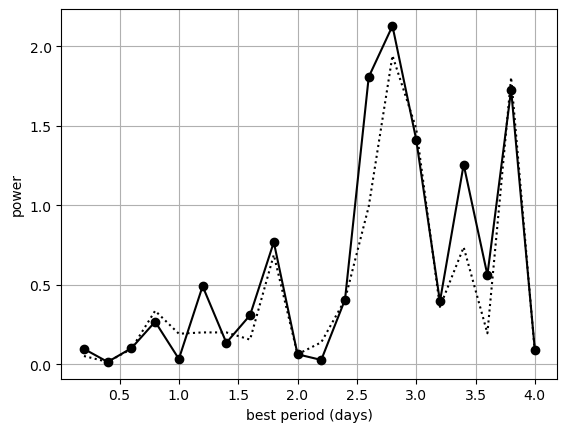

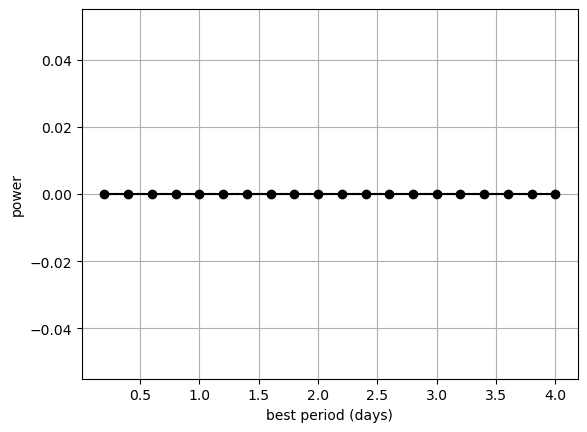

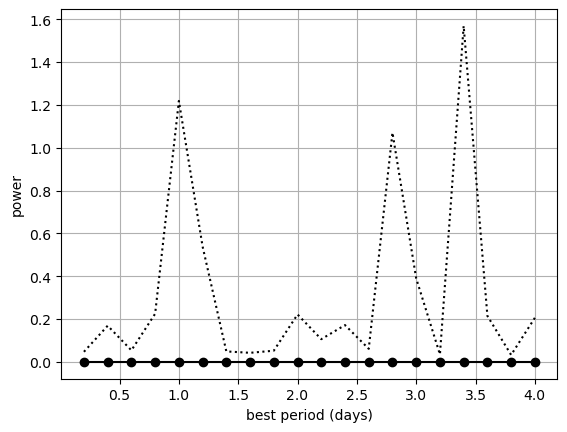

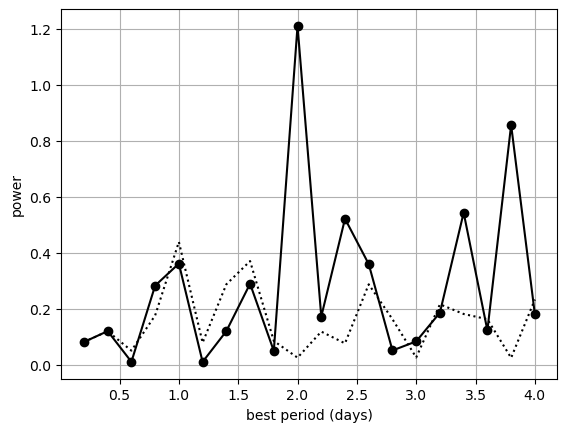

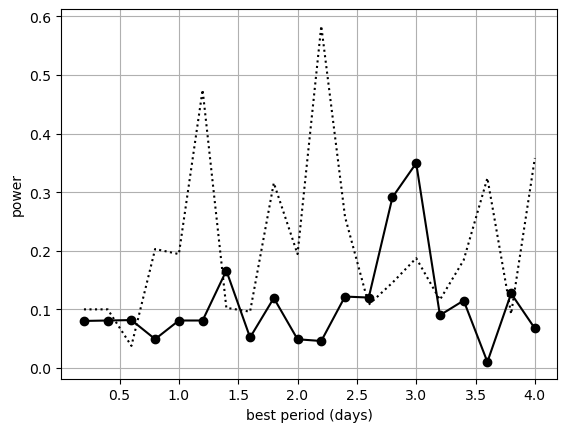

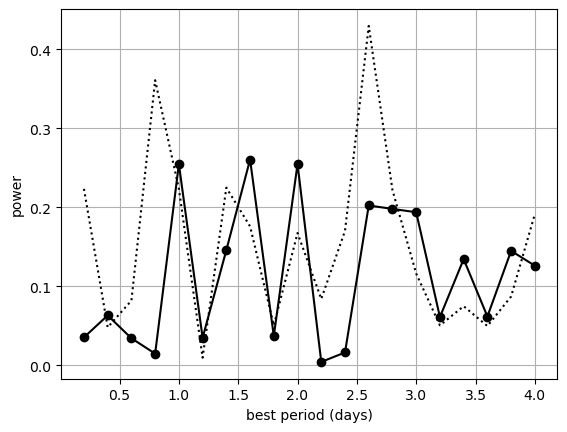

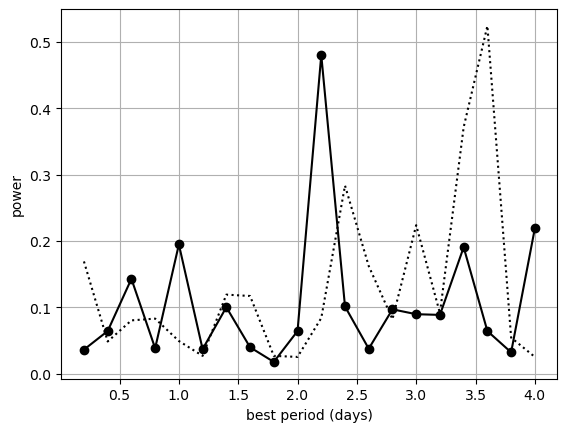

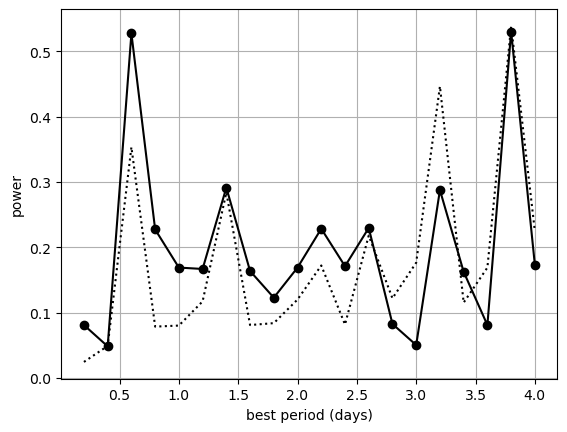

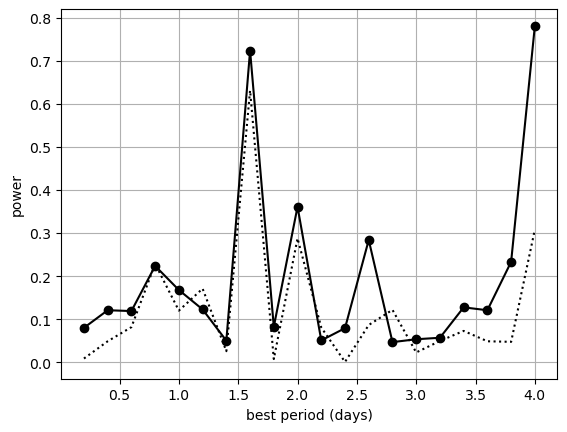

In [186]:
plt.plot(bestperiod_N_true, power_N_true, ':', color = 'k')
plt.plot(bestperiod_S_true, power_S_true, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show() 

plt.plot(bestperiod_N_2, power_N_2, ':', color = 'k')
plt.plot(bestperiod_S_2, power_S_2, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_3, power_N_3, ':', color = 'k')
plt.plot(bestperiod_S_3, power_S_3, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_4, power_N_4, ':', color = 'k')
plt.plot(bestperiod_S_4, power_S_4, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_5, power_N_5, ':', color = 'k')
plt.plot(bestperiod_S_5, power_S_5, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_6, power_N_6, ':', color = 'k')
plt.plot(bestperiod_S_6, power_S_6, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_7, power_N_7, ':', color = 'k')
plt.plot(bestperiod_S_7, power_S_7, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_8, power_N_8, ':', color = 'k')
plt.plot(bestperiod_S_8, power_S_8, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

plt.plot(bestperiod_N_9, power_N_9, ':', color = 'k')
plt.plot(bestperiod_S_9, power_S_9, 'o-', color = 'k')
plt.xlabel('best period (days)')
plt.ylabel('power')
plt.grid()
plt.show()

In [188]:
print(bestperiod_N_true)
print(bestperiod_S_true)

print(bestperiod_N_2)
print(bestperiod_S_2)

print(bestperiod_N_3)
print(bestperiod_S_3)

print(bestperiod_N_4)
print(bestperiod_S_4)

print(bestperiod_N_5)
print(bestperiod_S_5)

print(bestperiod_N_6)
print(bestperiod_S_6)

print(bestperiod_N_7)
print(bestperiod_S_7)

print(bestperiod_N_8)
print(bestperiod_S_8)

print(bestperiod_N_9)
print(bestperiod_S_9)

[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.5999999999999996, 3.8000000000000003, 4.0]
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.5999999999999996, 3.8000000000000003, 4.0]
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.5999999999999996, 3.8000000000000003, 4.0]
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.5999999999999996, 3.8000000000000003, 4.0]
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.5999999999999996, 3.8000000000000003, 4.0]
[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7999999999999998, 1.9999999999999996, 2.1999999999999997, 2.4, 2.6, 2.8, 3.0,

In [189]:
#times = np.linspace(0, 40, 1000)
#errs = np.array(np.ones(100000)/10)

#flux = []
#for i in vis_N:
#    if i == False:
#        f = 0
#        flux.append(f)
#    else:
#        f = 1
#        flux.append(f)


#vis_T = vis_N + vis_S

#rotate = ss.RotationModel(times, flux, errs)

#lomb_scargle_period = rotate.ls_rotation()
#acf_period = rotate.acf_rotation(interval=np.diff(times)[0])

#print(lomb_scargle_period, acf_period)

#period_grid = np.linspace(5, 20, 1000)
#pdm_period = rotate.pdm_rotation(period_grid, pdm_nbins=10)

#print(lomb_scargle_period, acf_period, pdm_period)